In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('datasets/Heart_Disease.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [9]:
columns = ["glucose", "BPMeds", "education", "cigsPerDay", "totChol", "heartRate", "BMI"]

for column in columns:
    df[column] = df[column].fillna(df[column].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [11]:
df.isnull().sum().sum()

np.int64(0)

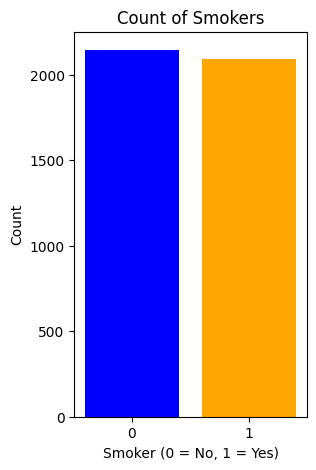

In [30]:
smoker_counts = df['currentSmoker'].value_counts()
plt.figure(figsize=(3, 5))
plt.bar(smoker_counts.index, smoker_counts.values, color=['blue', 'orange'])
plt.title('Count of Smokers')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

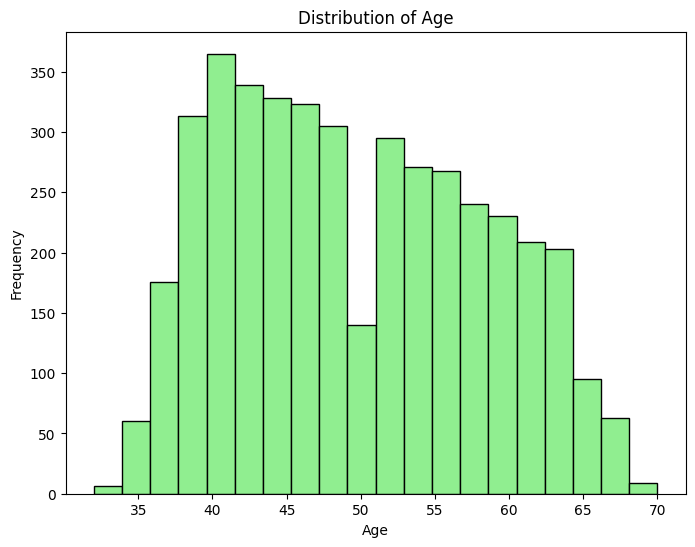

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

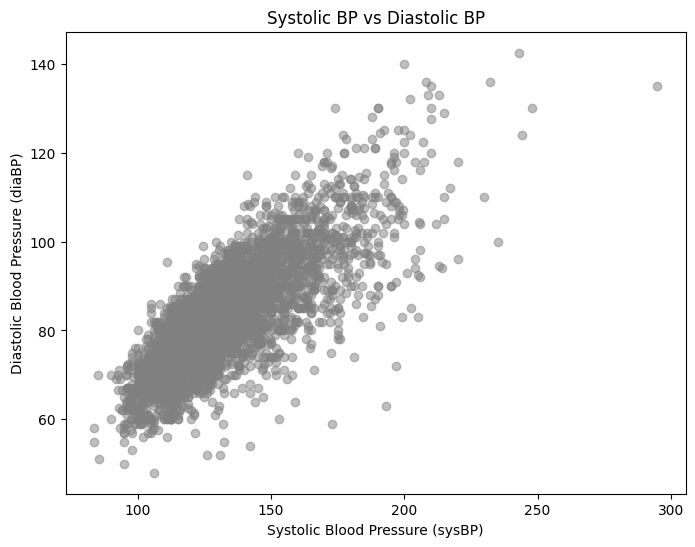

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df['sysBP'], df['diaBP'], alpha=0.5, color='gray')
plt.title('Systolic BP vs Diastolic BP')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Diastolic Blood Pressure (diaBP)')
plt.show()

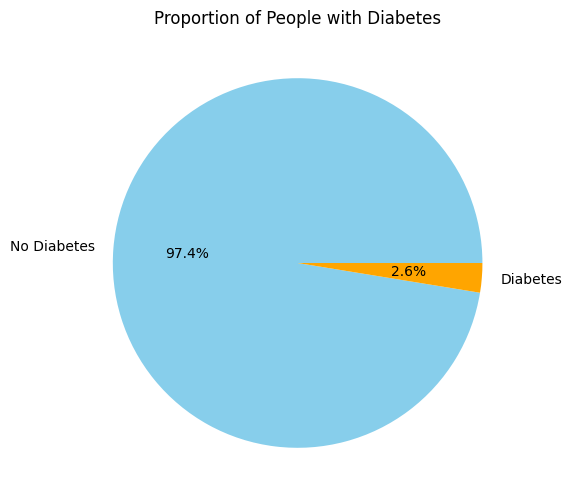

In [16]:
diabetes_counts = df['diabetes'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Proportion of People with Diabetes')
plt.show()

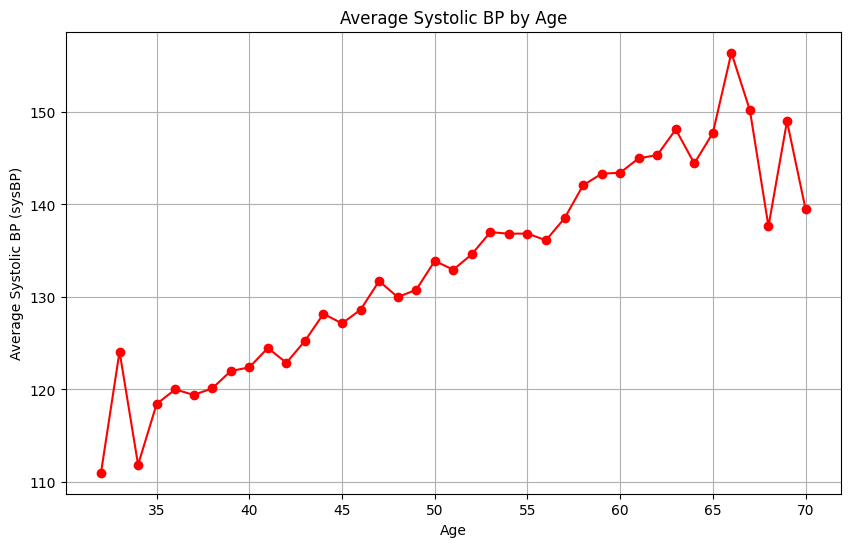

In [17]:
age_grouped = df.groupby('age')['sysBP'].mean()
plt.figure(figsize=(10, 6))
plt.plot(age_grouped.index, age_grouped.values, marker='o', color='red')
plt.title('Average Systolic BP by Age')
plt.xlabel('Age')
plt.ylabel('Average Systolic BP (sysBP)')
plt.grid(True)
plt.show()

In [20]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression(max_iter=200, random_state=42)

model.fit(X_train, y_train)

/home/ppriyankuu/Documents/IBM/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [33]:
print("Accuracy: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Classification report: ", class_report)

Accuracy:  0.8561320754716981
Confusion matrix:  [[719   5]
 [117   7]]
Classification report:                precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.58      0.06      0.10       124

    accuracy                           0.86       848
   macro avg       0.72      0.52      0.51       848
weighted avg       0.82      0.86      0.80       848

